Populating the interactive namespace from numpy and matplotlib
<Response [200]>


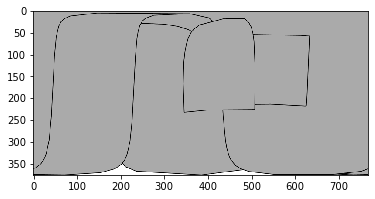

<Response [200]>

In [74]:
import requests
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from io import BytesIO

def create_workspace(name):
    headers = {'content-type': 'text/xml'}
    r1 = requests.post("http://localhost:8080/geoserver/rest/workspaces", 
    auth=('admin', 'geoserver'), 
    data='<workspace><name>' + name + '</name></workspace>',
    headers=headers)
    return r1
#     requests.get("curl -v -u admin:geoserver -XPOST -H 'Content-type: text/xml' -d '<workspace><name>" + name + "</name></workspace>' http://localhost:8080/geoserver/rest/workspaces")

# def create_db_conn(config_xml):
#     headers = {'content-type': 'text/xml'}
#     files = {'config.xml': open(config_xml, 'r')}
#     r1 = requests.post("http://localhost:8080/geoserver/rest/workspaces/upc/datastores", 
#     auth=('admin', 'geoserver'), 
#     files=files,
#     headers=headers)
#     return r1
    #requests.get("curl -v -u admin:geoserver -XPOST -T" + config.xml + "-H 'Content-type: text/xml' http://localhost:8080/geoserver/rest/workspaces/upc/datastores")

# def access_db_info(workname, dbname):
#     headers = {'content-type': 'text/xml'}
#     r1 = requests.get("http://localhost:8080/geoserver/rest/workspaces/" + workname + "/datastores/" + dbname + '.xml', 
#     auth=('admin', 'geoserver'), 
#     headers=headers)
#     return r1

def publish_table(tablename):
    headers = {'content-type': 'text/xml'}
    r1 = requests.post("http://localhost:8080/geoserver/rest/workspaces/cite/datastores/upcdev/featuretypes", 
    auth=('admin', 'geoserver'), 
    data='<featureType><name>' + tablename + '</name></featureType>',
    headers=headers)
    return r1

def create_new_sql_view(layer_name, sql_command="select * FROM datafiles_w_footprints WHERE instrumentid=21"):
    headers = {'content-type': 'text/xml'}
    data =  "<featureType><name>" + layer_name + "</name>" + \
            '''<nativeName>''' + layer_name + '''</nativeName>
            <namespace>
            <name>cite</name>
            <atom:link xmlns:atom='http://www.w3.org/2005/Atom' rel='alternate' href='http://arizona-umh.cs.umn.edu:8080/geoserver/rest/namespaces/cite.xml' type='application/xml'/> \
            </namespace>
            <title>''' + layer_name + '''</title>
            <keywords>
            <string>features</string>
            <string>''' + layer_name + '''</string>
            </keywords>
            <projectionPolicy>FORCE_DECLARED</projectionPolicy>
            <enabled>true</enabled>
            <metadata>
            <entry key='JDBC_VIRTUAL_TABLE'>
            <virtualTable>
            <name>''' + layer_name + '''</name>
            <sql>''' + sql_command + '''</sql>
            <escapeSql>true</escapeSql>
            <geometry>
            <name>footprint</name>
            <type>Geometry</type>
            <srid>-1</srid>
            </geometry>
            <geometry>
            <name>centroid</name>
            <type>Geometry</type>
            <srid>-1</srid>
            </geometry>
            </virtualTable>
            </entry>
            <entry key='cachingEnabled'>false</entry>
            </metadata>
            <store class='dataStore'>
            <name>cite:upcdev</name>
            <atom:link xmlns:atom='http://www.w3.org/2005/Atom' rel='alternate' href='http://arizona-umh.cs.umn.edu:8080/geoserver/rest/workspaces/cite/datastores/AlwaysShen.xml' type='application/xml'/> \
            </store>
            </featureType>'''

    r1 = requests.post("http://localhost:8080/geoserver/rest/workspaces/cite/datastores/upcdev/featuretypes", 
    auth=('admin', 'geoserver'),
    headers=headers, data=data)
    return r1

def get_image(layer_name):
    r1 = requests.get("http://localhost:8080/geoserver/wms/reflect?layers=cite:" + layer_name)
    print(r1)
    im = Image.open(BytesIO(r1.content))
    plt.imshow(im)
    plt.show()
    return r1

# dbcreate = create_workspace("upc")
# x = publish_table("datafiles_w_footprints")
# print(x)
create_new_sql_view('voyager4')
get_image('voyager4')

# curl -v -u admin:geoserver -XGET http://localhost:8080/geoserver/rest/workspaces/upc/datastores/upcdev.xml

# curl -v -u admin:geoserver -XPOST -H "Content-type: text/xml" -d "<featureType><name>datafiles_w_footprints</name></featureType>" http://localhost:8080/geoserver/rest/workspaces/upc/datastores/upcdev/featuretypes

# wget http://localhost:8080/geoserver/wms/reflect?layers=upc:datafiles_w_footprints